In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin1')


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

## Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True, errors='ignore')

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.rename(columns={'v1': 'class', 'v2': 'message'}, inplace=True)
df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['class']= encoder.fit_transform(df['class'])
df.sample(5)


,class,message
1225,0,"sir, you will receive the account no another 1..."
3890,0,No problem. We will be spending a lot of quali...
5434,0,Jesus armand really is trying to tell everybod...
1247,0,Horrible gal. Me in sch doing some stuff. How ...
1101,0,"Yeah go on then, bored and depressed sittin wa..."


In [ ]:
df.isnull().sum()

,0
class,0
message,0


In [ ]:
df.duplicated().sum()

403

In [ ]:
#drop duplictes
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
df.duplicated().sum()

0

# Exploratory Data Analysis

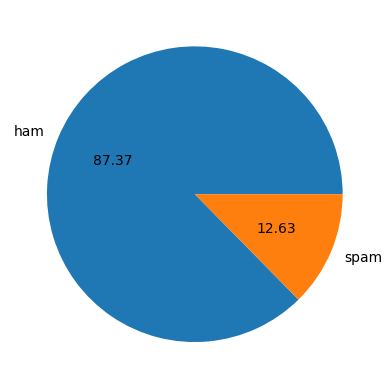

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['class'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [ ]:
!pip install nltk

In [ ]:

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['num_characters']= df['message'].apply(len)
df.head()

,class,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,class,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,class,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: xlabel='num_characters', ylabel='Count'>

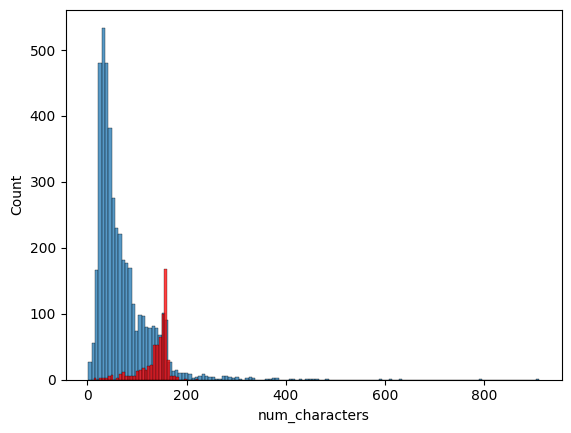

In [ ]:
import seaborn as sns

sns.histplot(df[df['class']==0]['num_characters'])
sns.histplot(df[df['class']==1]['num_characters'], color='red')


<Axes: xlabel='num_words', ylabel='Count'>

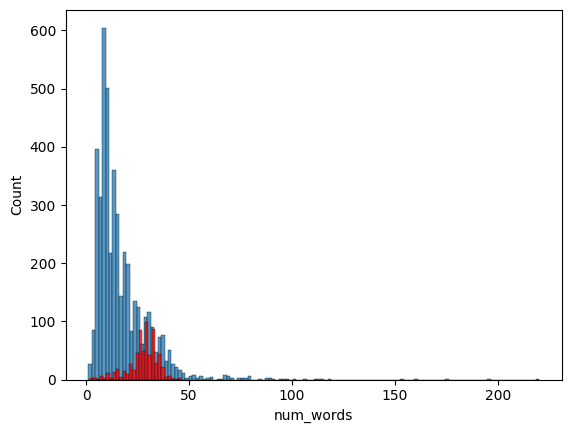

In [ ]:
sns.histplot(df[df['class']==0]['num_words'])
sns.histplot(df[df['class']==1]['num_words'], color='red')


<Axes: xlabel='num_sentences', ylabel='Count'>

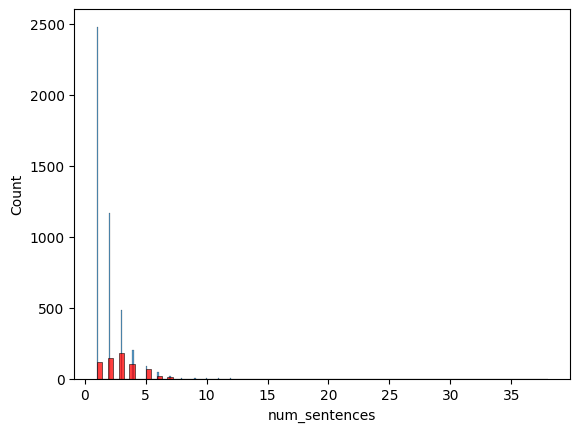

In [ ]:
sns.histplot(df[df['class']==0]['num_sentences'])
sns.histplot(df[df['class']==1]['num_sentences'], color='red')

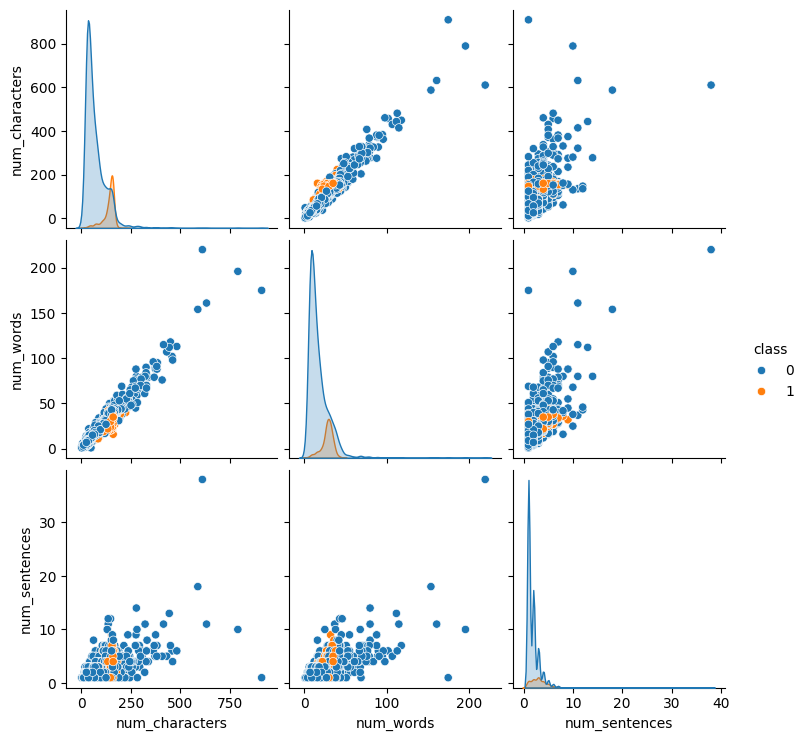

In [ ]:
sns.pairplot(df, hue='class')

In [ ]:
df[df['class']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['class']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: >

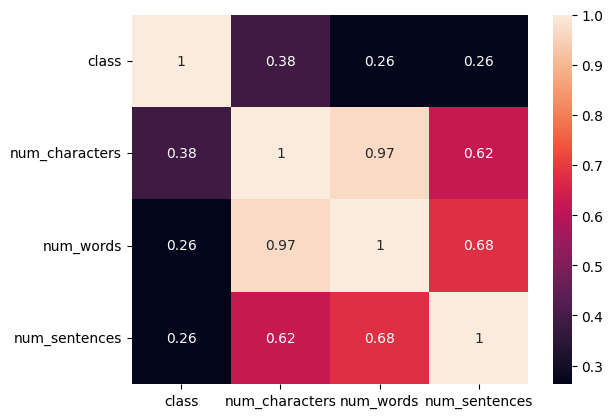

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Text Preprocessing

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
ps=PorterStemmer()
def transform_message(message):
    message = message.lower()
    message = nltk.word_tokenize(message)
    y=[]
    for i in message:
        if i.isalnum():
            y.append(i)
    message = y[:]
    y.clear()
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()
    for i in message:
      y.append(ps.stem(i))
    return y


In [ ]:
df['tranformed_message'] = df['message'].apply(transform_message).apply(' '.join)

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')

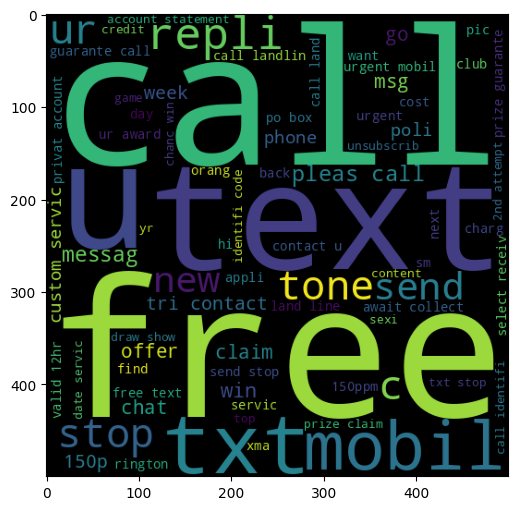

In [ ]:
spam_wc = wc.generate(df[df['class']==1]['tranformed_message'].str.cat(sep=" "))
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

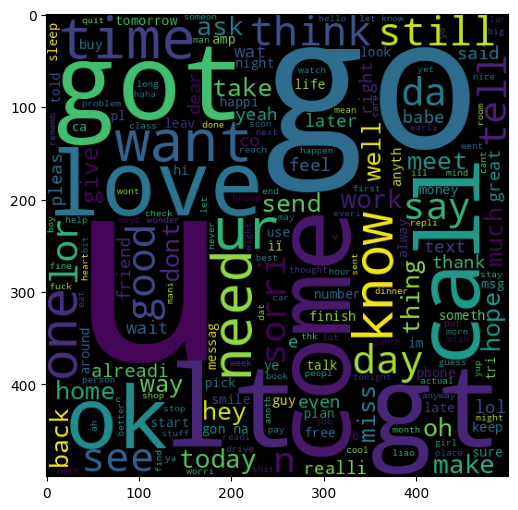

In [ ]:
ham_wc = wc.generate(df[df['class']==0]['tranformed_message'].str.cat(sep=" "))
plt.figure(figsize=(10,6))
plt.imshow(ham_wc)

In [ ]:
spam_count=[]
for msg in df[df['class']==1]['tranformed_message'].tolist():
  for word in msg.split():
    spam_count.append(word)
print(len(spam_count))

9939


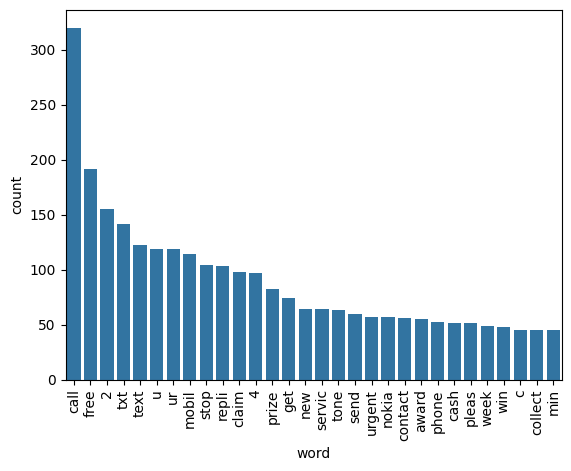

In [ ]:
from collections import Counter
word_count = Counter(spam_count)
top_30_spam_words = word_count.most_common(30)
data = pd.DataFrame(top_30_spam_words, columns=['word', 'count'])
sns.barplot(x='word', y='count', data=data)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_count=[]
for msg in df[df['class']==0]['tranformed_message'].tolist():
  for word in msg.split():
    ham_count.append(word)
print(len(ham_count))


35404


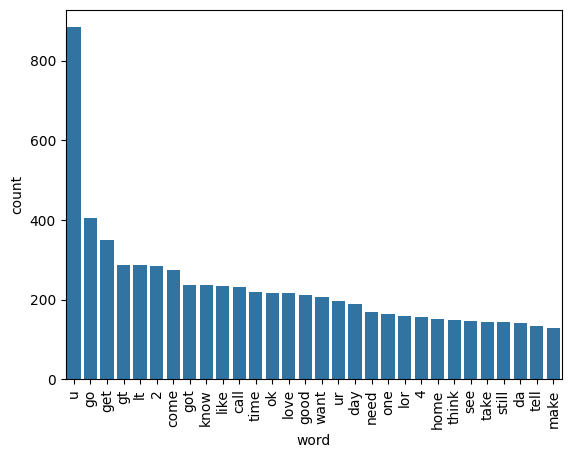

In [ ]:
from collections import Counter
word_count = Counter(ham_count)
top_30_ham_words = word_count.most_common(30)
data = pd.DataFrame(top_30_ham_words, columns=['word', 'count'])
sns.barplot(x='word', y='count', data=data)
plt.xticks(rotation='vertical')
plt.show()

# Building model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfid = TfidfVectorizer(max_features=3000)

In [ ]:
X=tfid.fit_transform(df['tranformed_message']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y=df['class'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [ ]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(y_train)

[0 0 0 ... 0 0 1]


In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
print(accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))

0.8669760247486465
[[965 142]
 [ 30 156]]
0.5234899328859061


In [ ]:
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))

0.9706109822119103
[[1105    2]
 [  36  150]]
0.9868421052631579


In [ ]:
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print(precision_score(y_test, y_pred_bnb))

0.9729311678267595
[[1103    4]
 [  31  155]]
0.9748427672955975


In [ ]:
import pickle
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))